# Separation
In this notebook we look at how gravity separates a mixture of two kinds of discs of differening masses. The discs are initially mixed and start with the same speed (but travelling in differing directions).

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import billiards as bl

In [61]:
# Setup the simulation
L = 300.0  # Simulation width
bottom_left = np.array([-L/2, -L/2])
top_right = np.array([L/2, L/2])

sim = bl.PySim(bottom_left, top_right, 149, 149)

# Set gravity
sim.g = np.array([0.0, -0.1])

# Number, speed, masses, radii of discs
N_discs = 10_000
v = 1.0
R = 1.0

# Generate the masses of the discs
N1 = 5_000
N2 = N_discs - N1
m1, m2 = 1.0, 10.0
m = np.concatenate((np.full(N1, m1), np.full(N2, m2)))

rng = np.random.default_rng(10)
rng.shuffle(m)

sim.add_random_discs(bottom_left, top_right, N_discs, m, R, v=v, pos_allocation='grid')

Create a plot showing initial locations of all discs

In [62]:
def create_state_plot(cur_pos):
    fig = plt.figure(figsize=(8, 8))
    ax = plt.gca()
    
    plt.xlim(bottom_left[0], top_right[0])
    plt.ylim(bottom_left[1], top_right[1])
    
    # Size of discs
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width_in_points = bbox.width * 72
    
    s = 4 * ( width_in_points * R/L) ** 2
    
    for mass in (m1, m2):
        plt.scatter(cur_pos[m==mass, 0], cur_pos[m==mass, 1], s=s, alpha=0.5, label=f"m={mass}")
    
    plt.legend(loc='upper right')

    return ax

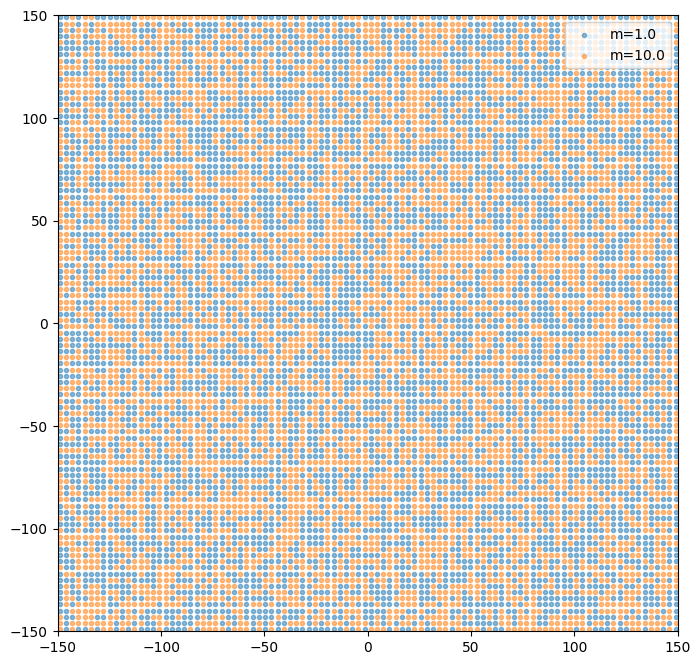

In [63]:
initial_pos = sim.initial_state['r']
_ = create_state_plot(initial_pos)

Now look at the state after some time has passed. Note this may take 10-15 minutes to compute.

In [64]:
# Run the simulation for a bit, only interested in the final state, so no need to record events
sim.advance(75_000_000, 10000.0, False)
print(f"Simulation ended at {sim.current_time}")

Simulation ended at 1962.0676339121367


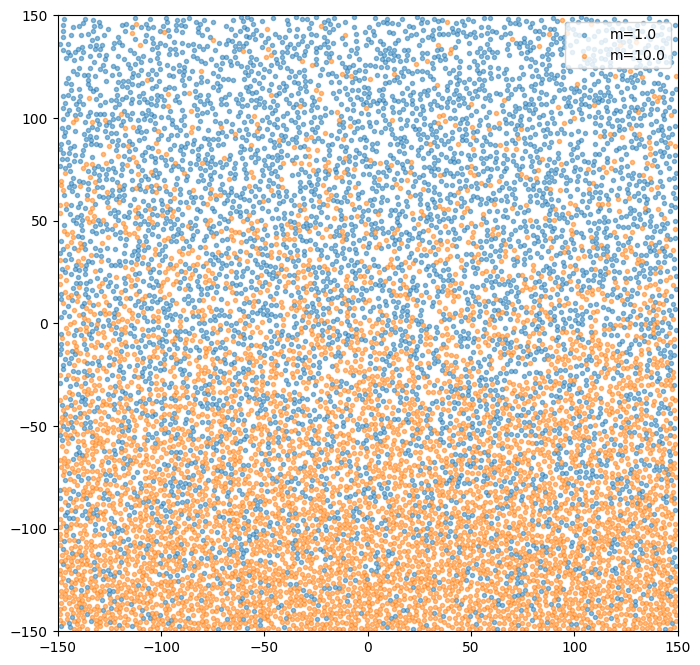

In [69]:
cur_state = sim.current_state
cur_pos = cur_state['r']
cur_t = cur_state['t']
cur_v = cur_state['v']

cur_pos += cur_v*(sim.current_time - cur_t)[:, np.newaxis]


_ = create_state_plot(cur_pos)

We can now look how the number of each species varies with height.

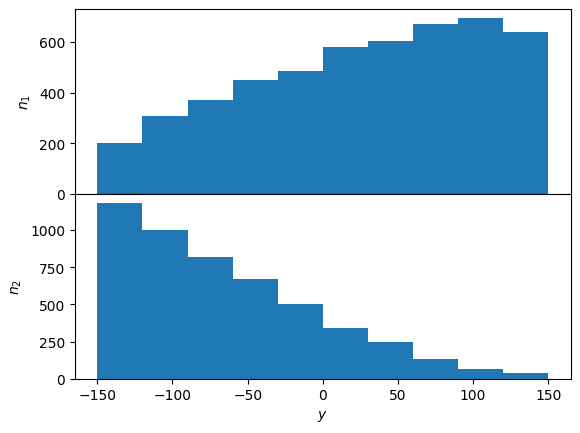

In [70]:
bins = np.linspace(-L/2, L/2, 11)
disc_pos = sim.current_state['r']

fig, axs = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0)


N_disc_y = []

for m_ind, mass in enumerate([m1, m2]):
    n, _, _ = axs[m_ind].hist(disc_pos[m==mass, 1], bins)
    N_disc_y.append(n)

plt.xlabel("$y$")
axs[0].set(ylabel="$n_1$")
axs[1].set(ylabel="$n_2$")


plt.show()

In [71]:
total = N_disc_y[0] + N_disc_y[1]
above = N_disc_y[0] / total
below = N_disc_y[1] / total

pos_dict = {
    m1: above,
    m2: below,
}

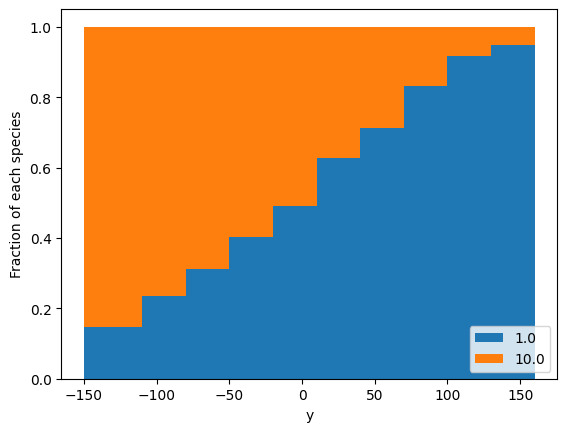

In [72]:
fig, ax = plt.subplots()
bottom = np.zeros(bins.shape[0]-1)

for mass, weights in pos_dict.items():
    ax.bar(bins[:-1]+20.0, weights, width=40.0, label=mass, bottom=bottom)
    bottom += weights

plt.xlabel("y")
plt.ylabel("Fraction of each species")
plt.legend(loc='lower right')
plt.show()